In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [4]:
TRAINING_DIR = '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Train'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                   samplewise_center=False,  # set each sample mean to 0
                                   featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                   samplewise_std_normalization=False,  # divide each input by its std
                                   zca_whitening=False,  # apply ZCA whitening
                                   rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
                                   zoom_range = 0.01, # Randomly zoom image 
                                   width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                   height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                   horizontal_flip=False,  # randomly flip images
                                   vertical_flip=False  
                                   )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64),
                                                    )

Found 115500 images belonging to 84 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Test',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )

Found 22260 images belonging to 84 classes.


In [7]:
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                                    '../input/bangla-isolated-dataset/Balanced_isloted_dataset/Validation',
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(64,64)
                                                     )

Found 24780 images belonging to 84 classes.


In [8]:
import os 
import warnings
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers, activations

In [9]:

classifier=Sequential()

classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu", input_shape=(64,64,3)))
classifier.add(Conv2D(filters=64, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(Conv2D(filters=128, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())  
classifier.add(Dropout(.2))  

classifier.add(Conv2D(filters=256, kernel_size = (3,3),padding='same', activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(BatchNormalization())
classifier.add(Dropout(.2))
    
classifier.add(Flatten())

classifier.add(Dense(512,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(256,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dense(128,activation="relu",kernel_regularizer= regularizers.l2(0.001)))
classifier.add(Dropout(.2))
    
classifier.add(Dense(84,activation="softmax"))




In [10]:
classifier.compile(loss='categorical_crossentropy', 
                metrics=['accuracy'],
                optimizer=Adam(learning_rate=0.00004))

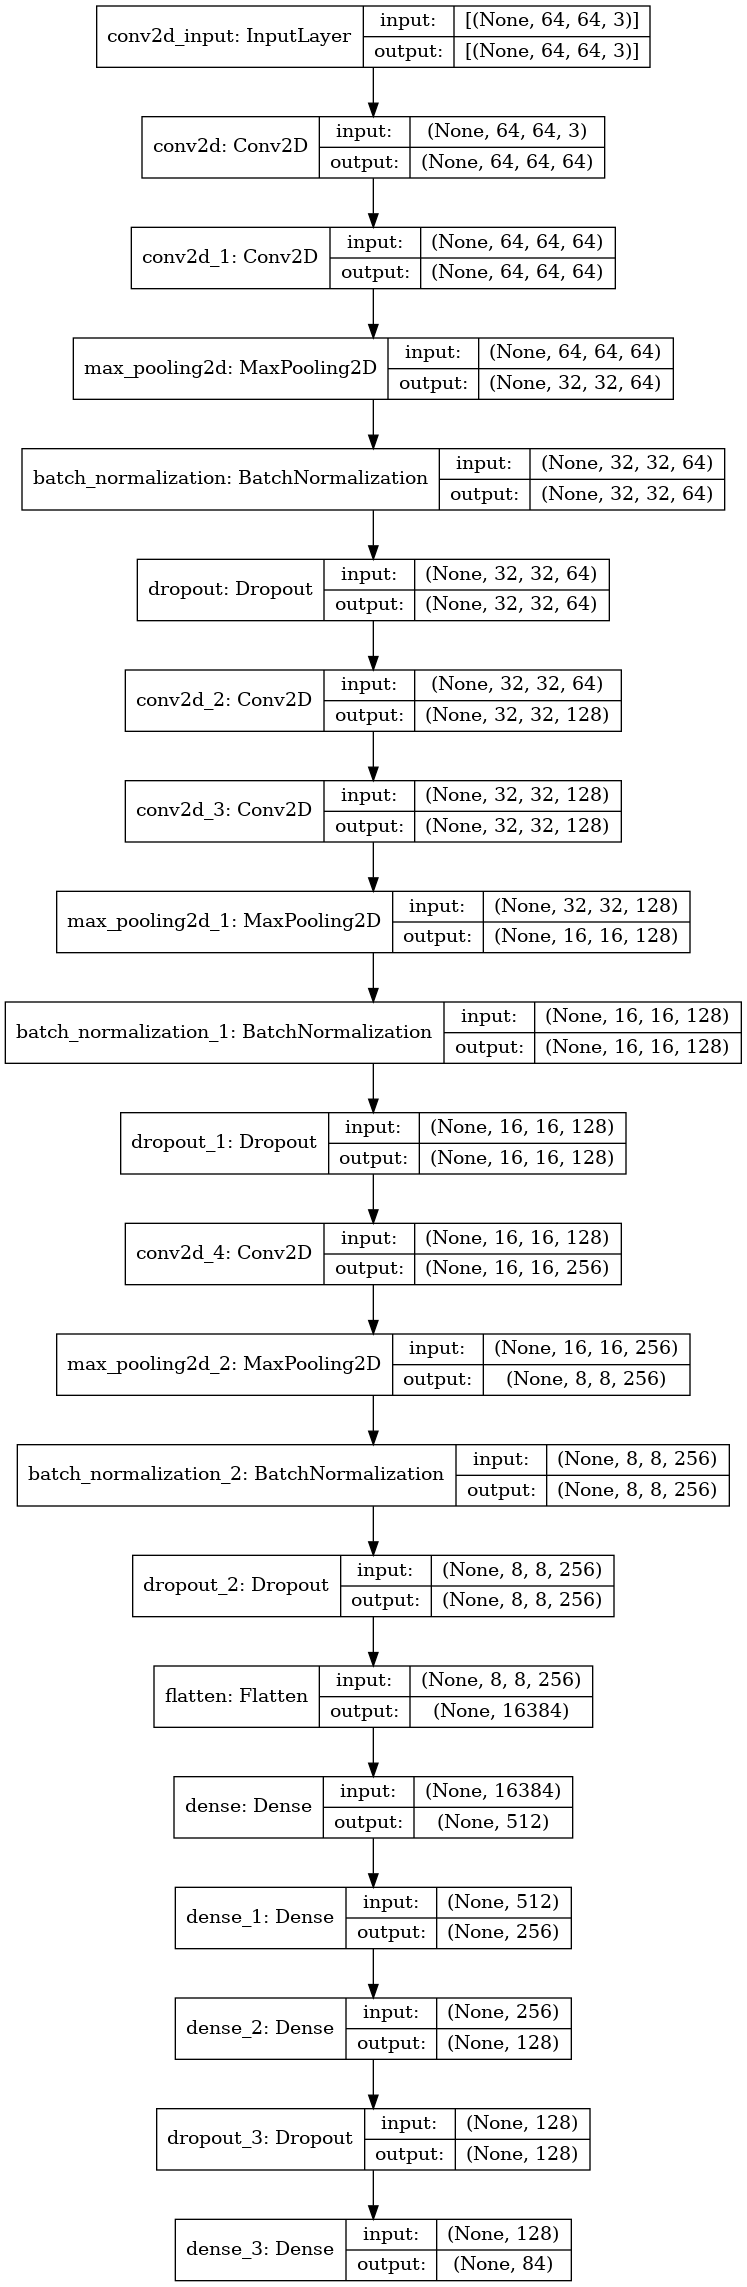

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, 'Architecture.png', show_shapes=True)

In [12]:
#Details for model
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       1

In [ ]:
from google.colab import files
files.download('Architecture.png')

In [13]:
filepath = "Final_Model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [14]:
history = classifier.fit(train_generator,steps_per_epoch = len(train_generator), epochs = 50,
                        validation_data = val_generator, validation_steps =  len(val_generator),callbacks=callbacks_list)

Epoch 1/50
903/903 [==============================] - 703s 769ms/step - loss: 4.4274 - accuracy: 0.2871 - val_loss: 2.7169 - val_accuracy: 0.6633

Epoch 00001: val_loss improved from inf to 2.71689, saving model to Final_Model.h5
Epoch 2/50
903/903 [==============================] - 299s 331ms/step - loss: 3.0652 - accuracy: 0.5591 - val_loss: 2.2653 - val_accuracy: 0.7607

Epoch 00002: val_loss improved from 2.71689 to 2.26531, saving model to Final_Model.h5
Epoch 3/50
903/903 [==============================] - 279s 309ms/step - loss: 2.6028 - accuracy: 0.6548 - val_loss: 2.0219 - val_accuracy: 0.8027

Epoch 00003: val_loss improved from 2.26531 to 2.02189, saving model to Final_Model.h5
Epoch 4/50
903/903 [==============================] - 272s 301ms/step - loss: 2.3153 - accuracy: 0.7134 - val_loss: 1.8485 - val_accuracy: 0.8330

Epoch 00004: val_loss improved from 2.02189 to 1.84854, saving model to Final_Model.h5
Epoch 5/50
903/903 [==============================] - 269s 297ms/ste

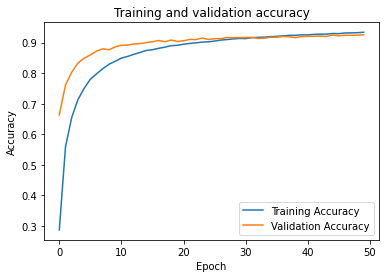

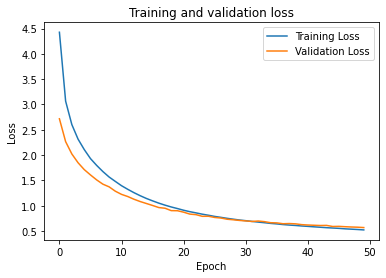

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

**Prediction **

In [18]:
loss_t, accuracy_t = classifier.evaluate(train_generator, steps=128)
loss, accuracy = classifier.evaluate(test_generator,steps=128)
loss_v, accuracy_v = classifier.evaluate(val_generator, steps=128)
print("\nTrain: accuracy = %f  ;  loss_v = %f\n" % (accuracy_t, loss_t))
print("Validation: accuracy = %f  ;  loss_v = %f\n" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f\n" % (accuracy, loss))


128/128 [==============================] - 16s 123ms/step - loss: 0.5687 - accuracy: 0.9240

Train: accuracy = 0.954468  ;  loss_v = 0.458219

Validation: accuracy = 0.924011  ;  loss_v = 0.568657

Test: accuracy = 0.928772  ;  loss = 0.540854

